In [1]:
from qiskit import *

In [2]:
#Define a curcuit with two quantum registers and 2 classical registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

In [3]:
#shortcut for the above definition
#circuit = QuantumCircuit(2,2)

In [4]:
#draw the circle
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
#apply hadamard gate on the first qubit
circuit.h(qr[0])


In [6]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [7]:
#controlled X operation from first qubit to the second
#The controlled-not gate flips the target qubit when the control qubit is in the state ∣1>

circuit.cx(qr[0],qr[1])

In [8]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [9]:
#measure the qubits by passing them to the classical registers
circuit.measure(qr, cr)

In [10]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [11]:
#simulate the quantum circuit locally
#Importing simulator
simulator = Aer.get_backend('qasm_simulator')

In [14]:
#execute the circuit on the imported simulator
#execute(circuit, backend = simulator)
result = execute(circuit, backend = simulator, shots = 1024).result()

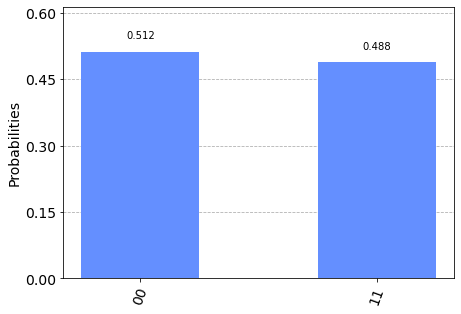

In [15]:
#Visualize result
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [16]:
#Running the circuit on IBM quantum computer

In [17]:
#Load IBM account
#IBMQ.save_account('token_id_here')  --this step is required only once
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
#select the provider 
provider = IBMQ.get_provider(hub = 'ibm-q')

In [19]:
#select the optimum quantum computer to run our code on

num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_belem


In [20]:
#select the quantum computer to run the circuit on
qcomp = provider.get_backend('ibmq_belem')

In [21]:
#import qiskit.tools.jupyter
#%qiskit_job_watcher

In [22]:
#Create a job
job = execute(circuit, backend=qcomp)

In [ ]:
#check job status
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (4)

In [ ]:
#View results
result = job.result()
plot_histogram(result.get_counts(circuit))

In [ ]:
#%qiskit_disable_job_watcher